# WIP: Life Expectancy - Clean data, EDA, Regression

In [124]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Prepare data
from scipy.stats.mstats import winsorize
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Model data
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate



# Read data

In [40]:
df = pd.read_csv('data/Life Expectancy Data.csv')
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


**Data Dictionary**  
- Developed or Developing status  
- Life Expectancy in age  
- Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)  
- Number of Infant Deaths per 1000 population  
- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)  
- Expenditure on health as a percentage of Gross Domestic Product per capita(%)  
- Hepatitis B (HepB) immunization coverage among 1-year-olds (%)  
- Measles - number of reported cases per 1000 population  
- Average Body Mass Index of entire population  
- Number of under-five deaths per 1000 population  
- Polio (Pol3) immunization coverage among 1-year-olds (%)  
- General government expenditure on health as a percentage of total government expenditure (%)  
- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)  
- Deaths per 1 000 live births HIV/AIDS (0-4 years)  
- Gross Domestic Product per capita (in USD)  
- Population of the country  
- Prevalence of thinness among children and adolescents for Age 10 to 19 (% )  
- Prevalence of thinness among children for Age 5 to 9(%)  
- Human Development Index in terms of income composition of resources (index ranging from 0 to 1)  
- Number of years of Schooling(years)  

# Clean and prepare the dataset

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

DF has 2938 rows and 21 columns; all the correct data type; quite a few missing values; col name have white space

In [42]:
# Strip whitespace from feature column names
df.rename(columns=lambda x: x.strip(),inplace=True)

In [43]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

Clean categorisation of countries

In [44]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [45]:
# Number of duplicates
df.duplicated().sum()

0

## Handle null values

In [46]:
# Null values as % of total values
(((df.isna().sum())/len(df))*100).round().sort_values(ascending=False)

Population                         22.0
Hepatitis B                        19.0
GDP                                15.0
Total expenditure                   8.0
Alcohol                             7.0
Schooling                           6.0
Income composition of resources     6.0
thinness 5-9 years                  1.0
thinness  1-19 years                1.0
BMI                                 1.0
Diphtheria                          1.0
Polio                               1.0
HIV/AIDS                            0.0
Country                             0.0
Year                                0.0
Measles                             0.0
percentage expenditure              0.0
infant deaths                       0.0
Adult Mortality                     0.0
Life expectancy                     0.0
Status                              0.0
under-five deaths                   0.0
dtype: float64

In [47]:
# Check pattern of null values for Population
df[df['Population'].isna()].tail(15)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.0,73.0,815,...,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0
2892,Yemen,2013,Developing,65.4,226.0,36,0.04,0.0,73.0,400,...,67.0,5.78,73.0,0.1,NaN,NaN,13.7,13.5,0.498,9.0
2893,Yemen,2012,Developing,64.7,236.0,36,0.04,0.0,67.0,2177,...,68.0,5.73,67.0,0.1,NaN,NaN,13.7,13.6,0.494,9.0
2894,Yemen,2011,Developing,64.6,234.0,35,0.04,0.0,69.0,2676,...,69.0,5.40,69.0,0.1,NaN,NaN,13.7,13.6,0.493,8.6
2895,Yemen,2010,Developing,64.4,233.0,35,0.06,0.0,76.0,510,...,77.0,5.17,76.0,0.1,NaN,NaN,13.7,13.7,0.488,8.5
2896,Yemen,2009,Developing,64.1,235.0,36,0.03,0.0,76.0,130,...,76.0,5.32,76.0,0.1,NaN,NaN,13.8,13.7,0.483,8.4
2897,Yemen,2008,Developing,63.8,238.0,37,0.04,0.0,78.0,7,...,78.0,5.12,78.0,0.1,NaN,NaN,13.8,13.7,0.480,8.5
2898,Yemen,2007,Developing,63.4,24.0,38,0.05,0.0,79.0,13,...,79.0,4.92,79.0,0.1,NaN,NaN,13.8,13.8,0.477,8.6
2899,Yemen,2006,Developing,63.0,242.0,39,0.04,0.0,78.0,8079,...,78.0,4.82,78.0,0.1,NaN,NaN,13.9,13.8,0.475,8.7
2900,Yemen,2005,Developing,62.6,245.0,40,0.04,0.0,8.0,6285,...,8.0,4.58,79.0,0.1,NaN,NaN,13.9,13.8,0.470,8.6


Null values appear per country, to fill null values by interpolation based on year

In [48]:
# Impute values with interpolation
years = df.Year.unique()
fill_list = ['Population','Hepatitis B', 'GDP','Total expenditure', 'Alcohol','Schooling','Income composition of resources','thinness 5-9 years','thinness  1-19 years','BMI','Diphtheria','Polio','Life expectancy','Adult Mortality']
for year in years:
    df.loc[df['Year'] == year,fill_list] = df.loc[df['Year'] == year,fill_list].interpolate()

In [49]:
# Check null values 
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

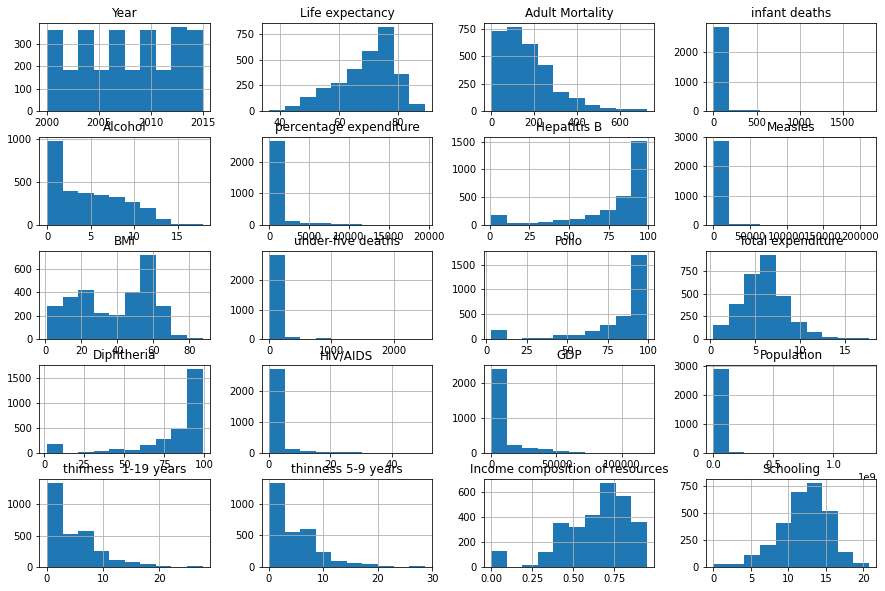

In [50]:
df.hist(figsize=(15,10));

Data not normally distributed

## Handle outliers

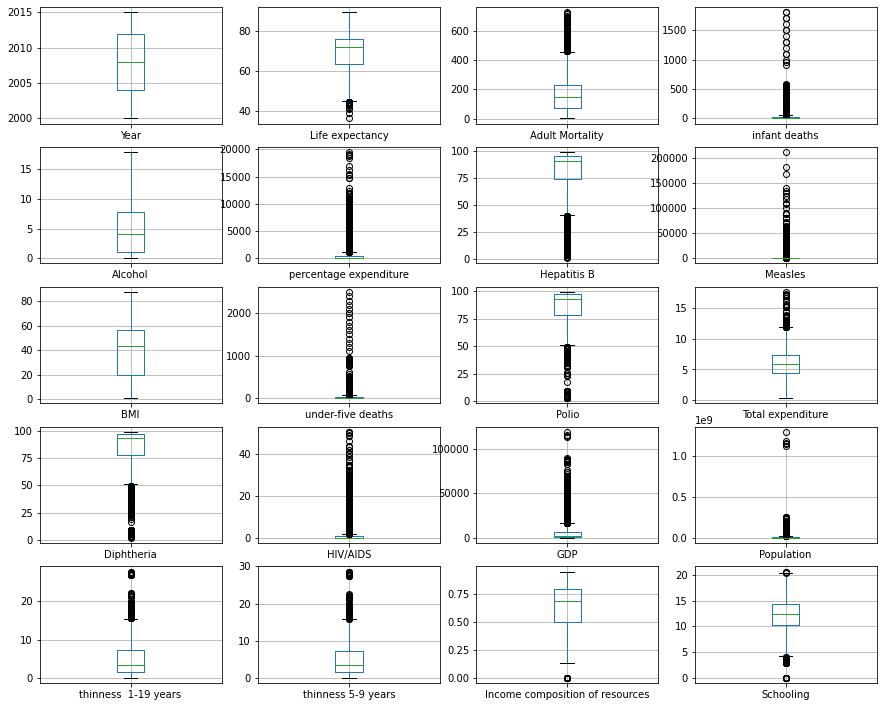

In [51]:
# Check outliers
plt.figure(figsize=(15,15))
for i, col in enumerate(['Year',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling'], start=1):
    plt.subplot(6, 4, i)
    df.boxplot(col)

Many of the variables, including target y have outliers

In [52]:
# Identify outliers using IQR as data distribution is not normal
columns = ['Year',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

print('% outlier per column')
for c in columns:
    Q1 = np.percentile(df[c], 25)
    Q3 = np.percentile(df[c], 75)
    IQR = Q3 - Q1
    upper = np.where(df[c] >= (Q3+1.5*IQR))
    lower = np.where(df[c] <= (Q1-1.5*IQR))
    print(f'{c}: {((len(upper[0])+len(lower[0]))/len(df))*100}') 

% outlier per column
Year: 0.0
Life expectancy: 0.5786249149081008
Adult Mortality: 2.9271613342409806
infant deaths: 11.095983662355344
Alcohol: 0.0
percentage expenditure: 13.240299523485364
Hepatitis B: 9.904697072838665
Measles: 18.447923757658273
BMI: 0.0
under-five deaths: 13.546630360789653
Polio: 9.496255956432947
Total expenditure: 1.4295439074200136
Diphtheria: 10.176991150442479
HIV/AIDS: 18.447923757658273
GDP: 14.295439074200136
Population: 12.525527569775358
thinness  1-19 years: 3.02927161334241
thinness 5-9 years: 3.2334921715452687
Income composition of resources: 4.424778761061947
Schooling: 1.8039482641252553


Almost all columns have outliers, particularly percentage expenditure, under-five deaths, HIV/AIDS, measles

<AxesSubplot:>

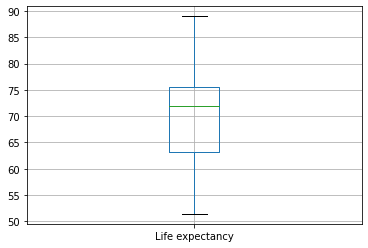

In [53]:
df['Life expectancy'] = winsorize(df['Life expectancy'],(0.05,0))
df.boxplot('Life expectancy')

<AxesSubplot:>

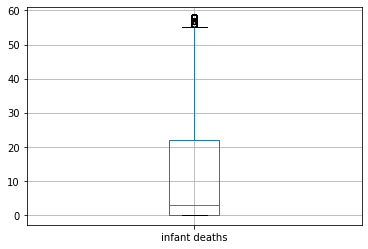

In [54]:
df['infant deaths'] = winsorize(df['infant deaths'],(0,0.1))
df.boxplot('infant deaths')

<AxesSubplot:>

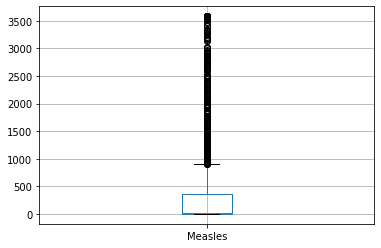

In [55]:
df['Measles'] = winsorize(df['Measles'],(0,0.1))
df.boxplot('Measles')

<AxesSubplot:>

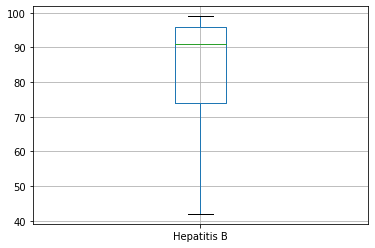

In [56]:
df['Hepatitis B'] = winsorize(df['Hepatitis B'],(0.1,0))
df.boxplot('Hepatitis B')

<AxesSubplot:>

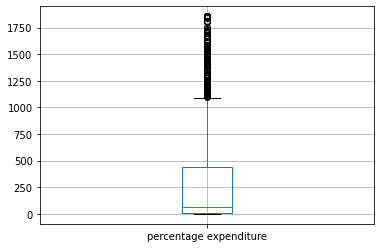

In [57]:
df['percentage expenditure']= winsorize(df['percentage expenditure'],(0,0.1))
df.boxplot('percentage expenditure')

<AxesSubplot:>

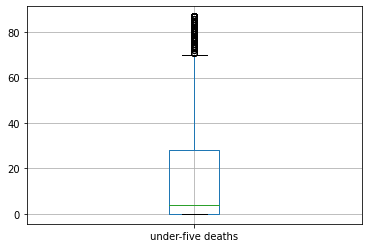

In [58]:
df['under-five deaths']= winsorize(df['under-five deaths'],(0,0.1))
df.boxplot('under-five deaths')

<AxesSubplot:>

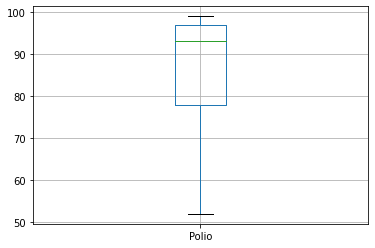

In [59]:
df['Polio']= winsorize(df['Polio'],(0.1,0))
df.boxplot('Polio')

<AxesSubplot:>

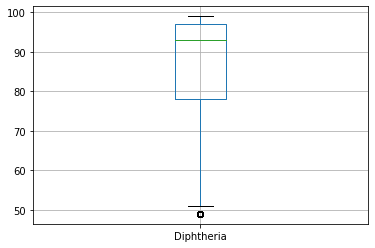

In [60]:
df['Diphtheria']= winsorize(df['Diphtheria'],(0.1,0))
df.boxplot('Diphtheria')

<AxesSubplot:>

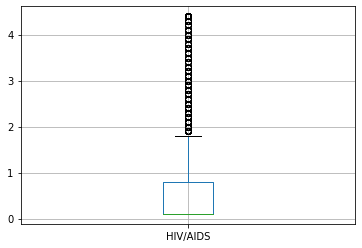

In [61]:
df['HIV/AIDS']= winsorize(df['HIV/AIDS'],(0,0.1))
df.boxplot('HIV/AIDS')

<AxesSubplot:>

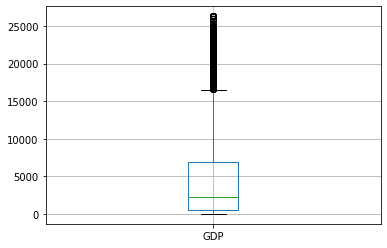

In [62]:
df['GDP']= winsorize(df['GDP'],(0,0.1))
df.boxplot('GDP')

In [63]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.415248,164.850749,13.948945,4.734061,369.795323,82.130900,586.539823,38.355071,20.004765,85.539142,5.955031,85.200987,0.878863,6093.931095,1.198185e+07,4.863019,4.898111,0.634659,12.078795
std,4.613841,9.085833,124.128560,19.797841,3.983435,588.210378,18.480216,1151.099202,19.967676,29.592867,15.298077,2.408100,15.928082,1.433147,8391.472562,5.477744e+07,4.410889,4.500110,0.209439,3.317549
min,2000.000000,51.400000,1.000000,0.000000,0.010000,0.000000,42.000000,0.000000,1.000000,0.000000,52.000000,0.370000,49.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,74.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,544.023758,2.896760e+05,1.600000,1.600000,0.501000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,4.070000,64.912906,91.000000,17.000000,43.300000,4.000000,93.000000,5.920000,93.000000,0.100000,2244.484692,1.544221e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,227.000000,22.000000,7.809732,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.390000,97.000000,0.800000,6957.890813,7.280902e+06,7.200000,7.300000,0.788000,14.300000
max,2015.000000,89.000000,723.000000,58.000000,17.870000,1855.828806,99.000000,3585.000000,87.300000,87.000000,99.000000,17.600000,99.000000,4.400000,26303.475067,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# EDA

In [64]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,58,0.01,71.279624,65.0,1154,...,52.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,58,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,58,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,58,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,58,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,51.4,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,4.4,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,51.4,715.0,26,4.06,0.000000,42.0,998,...,52.0,6.52,68.0,4.4,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,51.4,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,4.4,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,51.4,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,4.4,548.587312,12366165.0,1.6,1.7,0.427,9.8


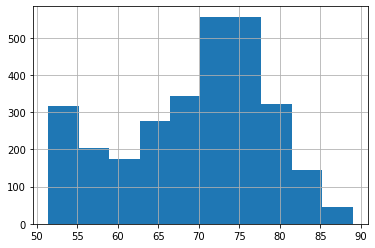

In [65]:
df['Life expectancy'].hist();

Life expectancy is roughly normally ditributed, with a peak around 52, likely due to winsorization

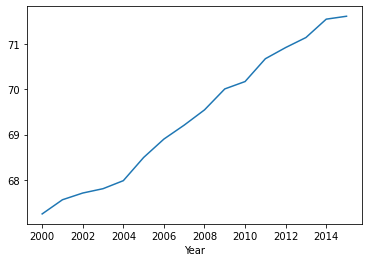

In [66]:
df.groupby('Year')['Life expectancy'].mean().plot();

Life expectancy has been increasing

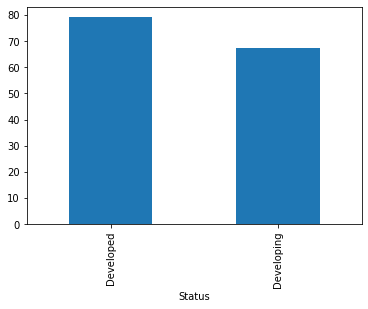

In [67]:
(df.groupby(['Status'])['Life expectancy'].mean()).plot(kind='bar');

Developed countries have a higher average life expectancy

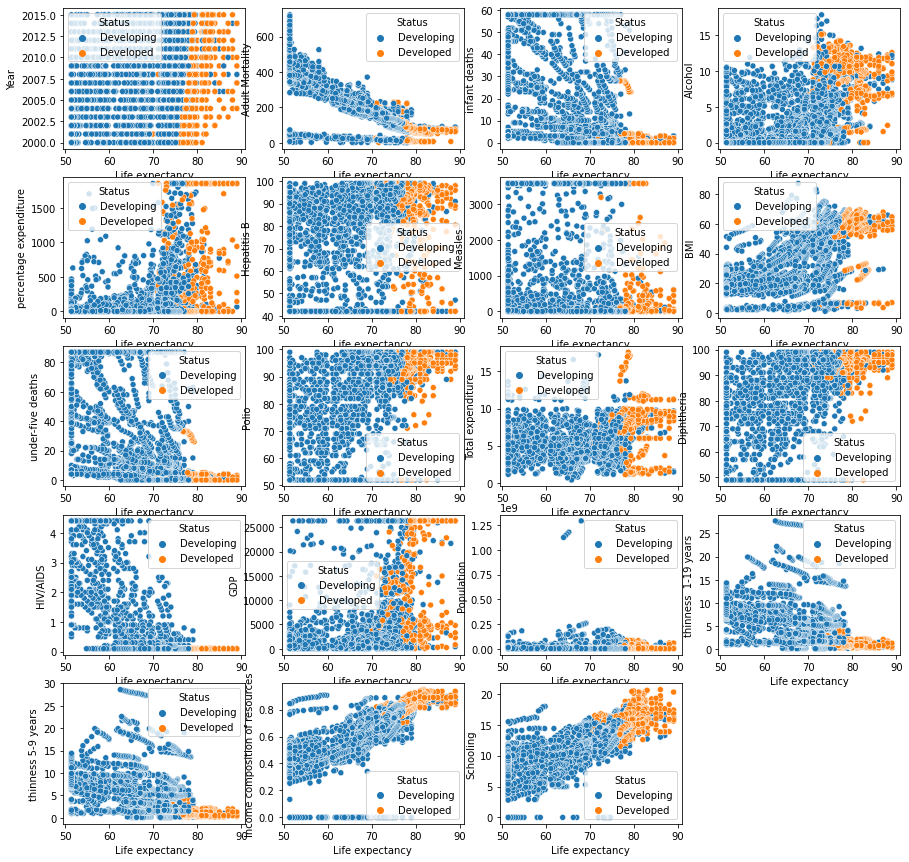

In [68]:
# Viewb relationships between life expectancy and other variables
plt.figure(figsize=(15,15))
for i, col in enumerate(['Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling'], start=1):
    plt.subplot(5, 4, i)
    sns.scatterplot(y=col, x='Life expectancy', data=df, hue='Status');

Clear divide between developing and developed, strong positive correlation with income composition of resources, schooling, BMI, alcohol; negative correlation with HIV/AIDS, under-five deaths, adult mortality, infant deaths

In [69]:
df=df.sort_values(by='Year', ascending=True)
px.scatter(df, x="GDP", y="Life expectancy", animation_frame="Year", animation_group="Country",
            color="Status", hover_name="Country",
           log_x=True, size_max=30, range_y=[40,90],title='<b> GDP vs Life expectancy over time')

Positive relationship between life expectancy and GDP over the years

In [70]:
px.scatter(
    df,y='Schooling',x='Life expectancy',size='Year',color = 'Country',
    title='<b>Life Expectancy Versus Years of Schooling per Countries per Year')

<AxesSubplot:>

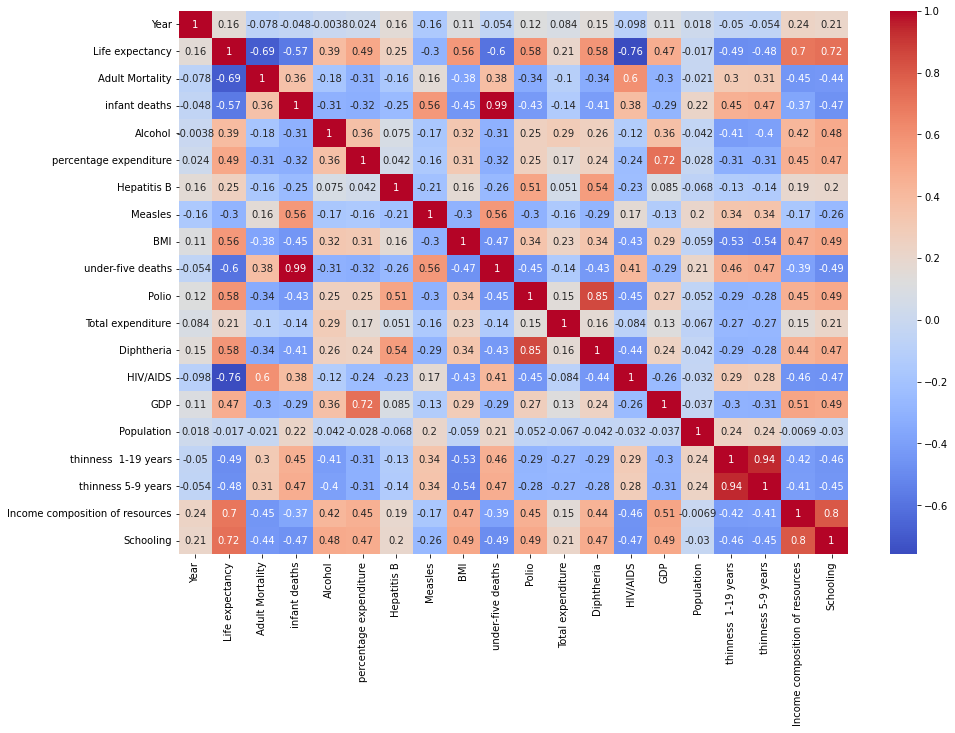

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

There may be some redundancy between under five deaths and infant deaths / thiness 1-19 and thinness 5-9

# Scale and encode data

In [72]:
# Encode Status columns
df.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [73]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['Status']])
status_encoded = ohe.transform(df[['Status']])
df['Developed'],df['Developing'] = status_encoded.T
df.drop(columns=['Status','Developed','Country'],inplace=True)

In [74]:
scaler = MinMaxScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [75]:
df_scaled

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developing
0,0.0,0.000000,0.919668,0.413793,0.093505,0.000000,0.649123,0.413668,0.283893,0.448276,...,0.390598,0.58,1.000000,0.020747,0.009446,0.394928,0.389474,0.457806,0.473430,1.0
1,0.0,0.449468,0.270083,0.000000,0.267637,0.118019,0.596491,0.000000,0.044032,0.000000,...,0.209518,0.84,0.046512,0.127852,0.000191,0.134058,0.126316,0.704641,0.565217,1.0
2,0.0,0.332447,0.403047,0.155172,0.335386,0.060642,1.000000,0.068340,0.497103,0.114943,...,0.219965,0.96,0.000000,0.046699,0.011503,0.094203,0.091228,0.713080,0.584541,1.0
3,0.0,0.034574,0.463989,0.051724,0.249160,0.008058,0.996491,0.000000,0.200463,0.045977,...,0.136970,0.00,0.418605,0.006502,0.000475,0.057971,0.052632,0.000000,0.000000,1.0
4,0.0,0.000000,0.051247,0.534483,0.515118,0.000000,0.578947,0.000000,0.345886,0.574713,...,0.440221,0.70,0.604651,0.285354,0.000052,0.302536,0.340351,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,0.792553,0.094183,0.051724,0.596305,0.000000,0.991228,0.025384,0.760139,0.045977,...,0.326756,0.94,0.000000,0.259045,0.003155,0.025362,0.017544,0.870781,0.669082,0.0
2934,1.0,0.614362,0.120499,0.120690,0.146473,0.000000,0.982456,0.061088,0.778679,0.091954,...,0.326756,0.98,0.000000,0.103840,0.005863,0.278986,0.263158,0.891350,0.777778,1.0
2935,1.0,0.614362,0.188366,0.000000,0.303314,0.000000,0.877193,0.000000,0.749710,0.011494,...,0.326756,0.84,0.000000,0.265830,0.005548,0.065217,0.059649,0.835443,0.724638,0.0
2936,1.0,0.627660,0.195291,0.724138,0.299287,0.000000,0.947368,0.059693,0.638470,0.540230,...,0.326756,0.94,0.000000,0.332889,0.002007,0.094203,0.087719,0.795359,0.734300,1.0


# Feature selection

In [80]:
corr = df_scaled.corr()

corr_df =corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

In [83]:
corr_df.head(10)

,feature_1,feature_2,correlation
192,under-five deaths,infant deaths,0.993803
72,infant deaths,under-five deaths,0.993803
373,thinness 5-9 years,thinness 1-19 years,0.939087
353,thinness 1-19 years,thinness 5-9 years,0.939087
262,Diphtheria,Polio,0.849549
222,Polio,Diphtheria,0.849549
417,Schooling,Income composition of resources,0.801376
397,Income composition of resources,Schooling,0.801376
40,Life expectancy,Schooling,0.724066
400,Schooling,Life expectancy,0.724066


Can drop infant deaths and thinness 1-19 years as redundant

In [87]:
df_scaled = df_scaled.drop(columns=['infant deaths','thinness 5-9 years'])

In [88]:
df_scaled

,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,Developing
0,0.0,0.000000,0.919668,0.093505,0.000000,0.649123,0.413668,0.283893,0.448276,0.553191,0.390598,0.58,1.000000,0.020747,0.009446,0.394928,0.457806,0.473430,1.0
1,0.0,0.449468,0.270083,0.267637,0.118019,0.596491,0.000000,0.044032,0.000000,0.829787,0.209518,0.84,0.046512,0.127852,0.000191,0.134058,0.704641,0.565217,1.0
2,0.0,0.332447,0.403047,0.335386,0.060642,1.000000,0.068340,0.497103,0.114943,0.936170,0.219965,0.96,0.000000,0.046699,0.011503,0.094203,0.713080,0.584541,1.0
3,0.0,0.034574,0.463989,0.249160,0.008058,0.996491,0.000000,0.200463,0.045977,0.000000,0.136970,0.00,0.418605,0.006502,0.000475,0.057971,0.000000,0.000000,1.0
4,0.0,0.000000,0.051247,0.515118,0.000000,0.578947,0.000000,0.345886,0.574713,0.659574,0.440221,0.70,0.604651,0.285354,0.000052,0.302536,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.0,0.792553,0.094183,0.596305,0.000000,0.991228,0.025384,0.760139,0.045977,0.936170,0.326756,0.94,0.000000,0.259045,0.003155,0.025362,0.870781,0.669082,0.0
2934,1.0,0.614362,0.120499,0.146473,0.000000,0.982456,0.061088,0.778679,0.091954,0.957447,0.326756,0.98,0.000000,0.103840,0.005863,0.278986,0.891350,0.777778,1.0
2935,1.0,0.614362,0.188366,0.303314,0.000000,0.877193,0.000000,0.749710,0.011494,0.829787,0.326756,0.84,0.000000,0.265830,0.005548,0.065217,0.835443,0.724638,0.0
2936,1.0,0.627660,0.195291,0.299287,0.000000,0.947368,0.059693,0.638470,0.540230,0.978723,0.326756,0.94,0.000000,0.332889,0.002007,0.094203,0.795359,0.734300,1.0


# Modelling

In [109]:
# Prepare X and y
X = df_scaled.drop(columns=['Life expectancy'])
y = df_scaled['Life expectancy']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [122]:
# Create baseline
baseline_model = DummyRegressor(strategy='mean')

# Assess performance of baseline
cv_results = cross_validate(baseline_model,X_train,y_train,cv=5, 
                           scoring=[
                                     'neg_mean_squared_error'])
abs(cv_results['test_neg_mean_squared_error'].mean())

0.058214351006026656

## Testing different models - Linear, Lasso, ElasticNet

In [123]:
linear = LinearRegression()

# Assess performance of model
cv_results = cross_validate(linear,X_train,y_train,cv=5, 
                           scoring=['neg_mean_squared_error'])
abs(cv_results['test_neg_mean_squared_error'].mean())


0.0085084237955096

In [125]:
len(X_train)

2056

In [ ]:

train_sizes = [50,300,600,1200,1500,2000]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#plt.plot(train_sizes, train_scores_mean, label = 'Training score')
#plt.plot(train_sizes, test_scores_mean, label = 'Test score')
#plt.ylabel('r2 score', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.legend()